# Data input

In general data can be acquired from:
* Downloadable files (e.g. CSV, txt, Excel, JSON, and other common data formats)
* APIs (Application Program Interface)
* Databases

In this lab we will provide examples of how to work with downloadable data in the two most common formats:
* CSV (comma-separated-values) or text files (txt) more generally 
* Excel or XLS files

Since urban analytics is often inherently spatial, we'll also consider another specific format often used for spatial data: JSON.

Once imported, we will also conduct some basic descriptive analytics, like getting the number of records, defining timeframes, and summing up numeric columns. It is always a good idea to start data analytics with such descriptive analysis since it not only gives an idea of the scale (and thus utility) of the data, but also highlights possible issues.

In [1]:
import pandas as pd 
import numpy as np

In [2]:
#A good practice when working with locally saved data folders is to specify a folder
dataDir = 'Data/'

## Example 1. The 311 service requests (CSV) in Boston

The data contains all 311 call service requests, including their time, location, type of issue, and many other details.

Source https://data.boston.gov/dataset/311-service-requests

In [3]:
#Specify the data location
fname = '311_service_requests_2020.csv'
url = 'https://data.boston.gov/dataset/8048697b-ad64-4bfc-b090-ee00169f2323/resource/6ff6a6fd-3141-4440-a880-6f60a37fe789/download/tmpxbo51van.csv'

In [4]:
#Import the data
boston311 = pd.read_csv(url) 

In [5]:
#Preview the data
boston311.head()

,case_enquiry_id,open_dt,target_dt,closed_dt,ontime,case_status,closure_reason,case_title,subject,reason,...,police_district,neighborhood,neighborhood_services_district,ward,precinct,location_street_name,location_zipcode,latitude,longitude,source
0,101003157986,2020-01-13 08:58:29,2020-04-12 08:58:29,NaN,OVERDUE,Open,,Rental Unit Delivery Conditions,Inspectional Services,Housing,...,B2,Roxbury,13,Ward 14,1401,40 Stanwood St,2121.0,42.3093,-71.0801,Constituent Call
1,101003158274,2020-01-13 11:53:00,2020-02-12 11:53:46,NaN,OVERDUE,Open,,Heat - Excessive Insufficient,Inspectional Services,Housing,...,B2,Roxbury,13,Ward 12,1207,9 Wayne St,2121.0,42.3074,-71.0853,Constituent Call
2,101003152474,2020-01-06 14:15:00,2020-01-07 14:15:39,NaN,OVERDUE,Open,,Unsafe/Dangerous Conditions,Inspectional Services,Building,...,A15,Charlestown,2,Ward 2,0204,21-23 Monument St,2129.0,42.3778,-71.0598,Constituent Call
3,101003154625,2020-01-08 15:39:00,2020-02-07 15:39:25,NaN,OVERDUE,Open,,Rodent Activity,Inspectional Services,Environmental Services,...,A7,East Boston,1,Ward 1,0102,98 Everett St,2128.0,42.3674,-71.0341,Constituent Call
4,101003160351,2020-01-15 11:09:00,2020-01-16 11:09:05,NaN,OVERDUE,Open,,Pick up Dead Animal,Public Works Department,Street Cleaning,...,C6,South Boston / South Boston Waterfront,0,0,0801,INTERSECTION Frontage Rd & Interstate 93 N,NaN,42.3594,-71.0587,Citizens Connect App


In [6]:
#Get a list of the columns
boston311.columns

Index(['case_enquiry_id', 'open_dt', 'target_dt', 'closed_dt', 'ontime',
       'case_status', 'closure_reason', 'case_title', 'subject', 'reason',
       'type', 'queue', 'department', 'submittedphoto', 'closedphoto',
       'location', 'fire_district', 'pwd_district', 'city_council_district',
       'police_district', 'neighborhood', 'neighborhood_services_district',
       'ward', 'precinct', 'location_street_name', 'location_zipcode',
       'latitude', 'longitude', 'source'],
      dtype='object')

In [7]:
#Get the total number of records
len(boston311)

251374

In [8]:
#Calculate summary statistics for all the numeric columns
boston311.describe()

,case_enquiry_id,location_zipcode,latitude,longitude
count,2.513740e+05,196565.000000,251374.000000,251374.000000
mean,1.010034e+11,2126.905726,42.332354,-71.078094
std,1.221623e+05,17.839402,0.033682,0.033676
min,1.010031e+11,2108.000000,42.230400,-71.185400
25%,1.010033e+11,2119.000000,42.308700,-71.093100
50%,1.010034e+11,2126.000000,42.341600,-71.066500
75%,1.010035e+11,2130.000000,42.359400,-71.058700
max,1.010036e+11,2467.000000,42.395200,-70.994900


This gives a good idea of how many records have a valid number defined and also gives averages and ranges for latitute/logitude. Statistics for zipcode and id won't make that much sense since these are really categorical in nature.

Additional descriptive analysis looks at the categorical variables, e.g. subject, reason, type, neighborhood, zip_code.

In [9]:
#Get all unique subjects
boston311.subject.unique()

array(['Inspectional Services', 'Public Works Department',
       'Transportation - Traffic Division', 'Animal Control',
       'Property Management', "Mayor's 24 Hour Hotline",
       'Parks & Recreation Department', 'Boston Water & Sewer Commission',
       'Boston Police Department', 'Consumer Affairs & Licensing',
       'Neighborhood Services'], dtype=object)

In [10]:
len(boston311.subject.unique())

11

In [11]:
len(boston311.reason.unique())

45

In [12]:
len(boston311.type.unique())

175

And if we want to know the number of complaints per subject we can group the dataframe as following:

In [13]:
boston311['subject'].value_counts()

Public Works Department              131207
Transportation - Traffic Division     54604
Inspectional Services                 21364
Mayor's 24 Hour Hotline               18247
Parks & Recreation Department         17354
Property Management                    3489
Animal Control                         3239
Boston Water & Sewer Commission        1220
Boston Police Department                588
Neighborhood Services                    36
Consumer Affairs & Licensing             26
Name: subject, dtype: int64

<AxesSubplot:xlabel='subject'>

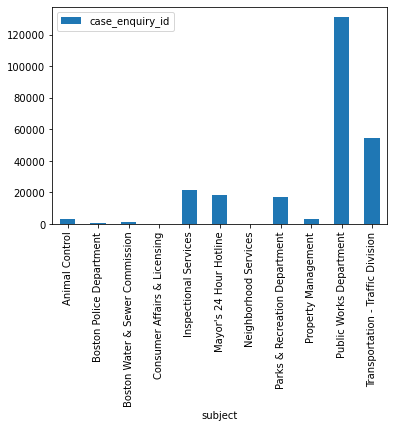

In [14]:
#Visualizing as a histogram
boston311[['subject','case_enquiry_id']].groupby(by=['subject']).count().plot.bar()

### Task 1. Count the number of neighborhoods and visualize the number of complaints by neighborhood

In [15]:
len(boston311['neighborhood'].unique())

25

<AxesSubplot:xlabel='neighborhood'>

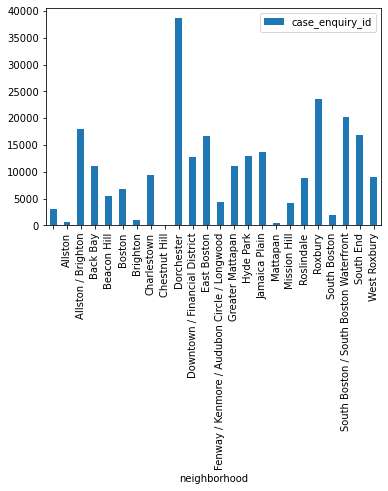

In [16]:
boston311[['neighborhood','case_enquiry_id']].groupby(by=['neighborhood']).count().plot.bar()

## Example 2. Real-estate data sales (XLS)

The data contains information on all the residential real estate sold in NYC, including address of the house/unit, size, age, time of sale, and price.

In [17]:
#The data is split by year and borough; taking just Brooklyn in 2015 
year = 2015
boro = 'brooklyn'

#Specify the data location
fname=str(year)+'_'+boro+'.xls'
url = 'https://www1.nyc.gov/assets/finance/downloads/pdf/rolling_sales/annualized-sales/'+str(year)+'/'+fname

In [18]:
#Import the data
re_sales = pd.read_excel(url)

In [19]:
#Preview the data
re_sales.head()

,"BROOKLYN ANNUALIZE SALE FOR 2015. (All Sales From January 1, 2015 - December 31, 2015)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,Sales File as of 3/31/2016. Coop Sales Files ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Neighborhood Name 4/1/16. Descriptive Data as...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Building Class Category is based on Building C...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BOROUGH\n,NEIGHBORHOOD\n,BUILDING CLASS CATEGORY\n,TAX CLASS AT PRESENT\n,BLOCK\n,LOT\n,EASE-MENT\n,BUILDING CLASS AT PRESENT\n,ADDRESS\n,APARTMENT NUMBER\n,...,RESIDENTIAL UNITS\n,COMMERCIAL UNITS\n,TOTAL UNITS\n,LAND SQUARE FEET\n,GROSS SQUARE FEET\n,YEAR BUILT\n,TAX CLASS AT TIME OF SALE\n,BUILDING CLASS AT TIME OF SALE\n,SALE PRICE\n,SALE DATE\n
4,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6360,22,,A5,8647 15TH AVENUE,,...,1,0,1,1547,1428,1930,1,A5,758000,2015-03-31 00:00:00


We'll need to skip first 4 lines to make it pandas-friendly. 

An alternative data ingestion approach is to first download to the local folder and then upload from local drive.

In [20]:
import urllib #use urllib mobule for web requests
dataDir='' #local data folder to use
urllib.request.urlretrieve(url, dataDir+fname)

('2015_brooklyn.xls', <http.client.HTTPMessage at 0x1c142cdf310>)

In [21]:
#Upload the data, skipping first 4 rows
re_sales = pd.read_excel(dataDir+fname, skiprows = 4)

In [22]:
#Preview properly-labeled version
re_sales.head()

,BOROUGH\n,NEIGHBORHOOD\n,BUILDING CLASS CATEGORY\n,TAX CLASS AT PRESENT\n,BLOCK\n,LOT\n,EASE-MENT\n,BUILDING CLASS AT PRESENT\n,ADDRESS\n,APARTMENT NUMBER\n,...,RESIDENTIAL UNITS\n,COMMERCIAL UNITS\n,TOTAL UNITS\n,LAND SQUARE FEET\n,GROSS SQUARE FEET\n,YEAR BUILT\n,TAX CLASS AT TIME OF SALE\n,BUILDING CLASS AT TIME OF SALE\n,SALE PRICE\n,SALE DATE\n
0,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6360,22,,A5,8647 15TH AVENUE,,...,1,0,1,1547,1428,1930,1,A5,758000,2015-03-31
1,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6361,17,,A5,55 BAY 10TH STREET,,...,1,0,1,1933,1660,1930,1,A5,778000,2015-06-15
2,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6371,60,,A9,8620 19TH AVENUE,,...,1,0,1,2417,2106,1930,1,A9,0,2015-09-16
3,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6372,48,,S1,1906 86TH STREET,,...,1,1,2,1900,2090,1931,1,S1,1365000,2015-05-29
4,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6373,73,,A1,50 BAY 23RD STREET,,...,1,0,1,2417,1672,1930,1,A1,750000,2015-12-17


In [23]:
#Get a list of the columns
re_sales.columns

Index(['BOROUGH\n', 'NEIGHBORHOOD\n', 'BUILDING CLASS CATEGORY\n',
       'TAX CLASS AT PRESENT\n', 'BLOCK\n', 'LOT\n', 'EASE-MENT\n',
       'BUILDING CLASS AT PRESENT\n', 'ADDRESS\n', 'APARTMENT NUMBER\n',
       'ZIP CODE\n', 'RESIDENTIAL UNITS\n', 'COMMERCIAL UNITS\n',
       'TOTAL UNITS\n', 'LAND SQUARE FEET\n', 'GROSS SQUARE FEET\n',
       'YEAR BUILT\n', 'TAX CLASS AT TIME OF SALE\n',
       'BUILDING CLASS AT TIME OF SALE\n', 'SALE PRICE\n', 'SALE DATE\n'],
      dtype='object')

Notice that field names contain an artifact from the original data represenation (end of line symbol '\n'). This means we won't be able to access the fields as before using "." syntax, but we can still use "[]" syntax:

In [24]:
re_sales['SALE PRICE\n'].sum()

19990077327

In [25]:
#Calculate summary statistics for all the numeric columns
re_sales.describe()

,BOROUGH\n,BLOCK\n,LOT\n,ZIP CODE\n,RESIDENTIAL UNITS\n,COMMERCIAL UNITS\n,TOTAL UNITS\n,LAND SQUARE FEET\n,GROSS SQUARE FEET\n,YEAR BUILT\n,TAX CLASS AT TIME OF SALE\n,SALE PRICE\n
count,25362.0,25362.000000,25362.000000,25362.000000,25362.000000,25362.000000,25362.000000,25362.000000,25362.000000,25362.000000,25362.000000,2.536200e+04
mean,3.0,4207.714534,281.084418,11217.017270,2.376981,0.185474,2.603817,2238.399456,2878.065649,1774.995584,1.699077,7.881901e+05
std,0.0,2649.487442,492.384071,186.770716,7.803233,2.711002,8.286863,6372.188724,10178.063689,542.988555,0.944152,3.198035e+06
min,3.0,20.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00
25%,3.0,1768.000000,21.000000,11209.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1910.000000,1.000000,0.000000e+00
50%,3.0,4149.000000,46.000000,11219.000000,1.000000,0.000000,1.000000,1900.000000,1744.500000,1929.000000,1.000000,3.300000e+05
75%,3.0,6540.000000,103.000000,11231.000000,2.000000,0.000000,2.000000,2500.000000,2880.000000,1957.000000,2.000000,8.130000e+05
max,3.0,8955.000000,9033.000000,11249.000000,338.000000,355.000000,355.000000,293000.000000,366000.000000,2016.000000,4.000000,1.690000e+08


Notive some initial issues with the data: minimum values of 0 for zip code, size, year (also average age of 1774 does not look right and is likely affected by that), and sale price show.

In [26]:
#Calculating average price per unit 
re_sales['SALE PRICE\n'].mean() 

788190.100425834

In [27]:
#Calculating average price per unit by ZIP Code 
re_sales[['ZIP CODE\n','SALE PRICE\n']].groupby(by=['ZIP CODE\n']).mean()

,SALE PRICE\n
ZIP CODE,
0,4.892857e+05
11201,1.618065e+06
11203,4.190376e+05
11204,4.908219e+05
11205,7.062129e+05
11206,1.213060e+06
11207,4.006299e+05
11208,3.979557e+05
11209,5.333751e+05


<AxesSubplot:xlabel='ZIP CODE\n'>

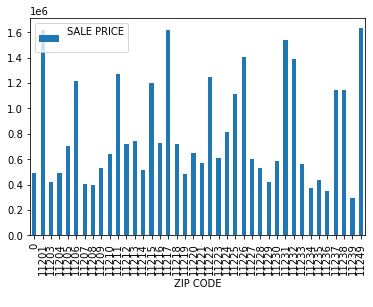

In [28]:
#Visualizing as a histogram
re_sales[['ZIP CODE\n','SALE PRICE\n']].groupby(by=['ZIP CODE\n']).mean().plot.bar()

Price per unit is not always the best characteristic as units might be quite different, ranging from small studios to large houses. Additionally, particularly expensive sales may affect the average. Median price is often used along with the price per square foot to address both of these concerns. In the next excercise, we'll try to compute an average price per square foot. For now let's skip the technical issue like missing/zero data and just plow ahead. In the next lab we'll talk about how those should addressed.

### Task 2. 
Quantify the average price per square foot by ZIP Code. Visualize the result as a bar plot. Which ZIP Codes are the three most expensive ones?

In [29]:
price_per_sqft = re_sales[['ZIP CODE\n','GROSS SQUARE FEET\n','SALE PRICE\n']].groupby(by = ['ZIP CODE\n']).sum()

price_per_sqft['PRICE_PER_SQFT'] = price_per_sqft['SALE PRICE\n'] / price_per_sqft['GROSS SQUARE FEET\n']

price_per_sqft.head()

,GROSS SQUARE FEET\n,SALE PRICE\n,PRICE_PER_SQFT
ZIP CODE,,,
0,0,3425000,inf
11201,2634291,1986984263,754.276677
11203,1763658,271955412,154.199631
11204,1468675,318543428,216.891707
11205,2532107,538840478,212.803202


<AxesSubplot:xlabel='ZIP CODE\n'>

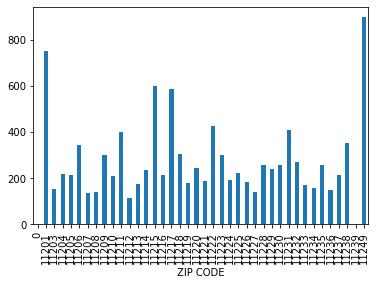

In [30]:
price_per_sqft['PRICE_PER_SQFT'].plot.bar()

In [31]:
price_per_sqft[price_per_sqft['PRICE_PER_SQFT'] != np.inf].sort_values(by = 'PRICE_PER_SQFT', ascending = False).head(3)

,GROSS SQUARE FEET\n,SALE PRICE\n,PRICE_PER_SQFT
ZIP CODE,,,
11249,1100543,989082814,898.722552
11201,2634291,1986984263,754.276677
11215,2004753,1202527889,599.838428


## Example 3. Street Pavement Rating

The New York City Department of Transportation is responsible for keeping the City's streets in good repair. The Agency performs ongoing assessment of New York City streets. Ratings are based on a scale from 1 to 10, and results are grouped in the following categories: Good (%) - ratings of 8 to 10, Fair (%) - ratings of 4 to 7, and Poor (%) - ratings of 1 to 3. Rating dates started from 1994 to 2019. This data will allow you to create a map.

GeoJSON is a JSON based format designed to represent geographical features with their non-spatial attributes. Besides GeoJSON, shapefile is also a common format for geographical datasets. For more information, please check https://geojson.org/.

As JSON contains spatial information (in this case shapes of the streets) along with the data, we'll need a slightly different vehicle to load it. There is a module called geopandas which we'll use below. In short its just like pandas, but it has a special column "geometry" which is meant to contain spatial info.

In [32]:
import geopandas as gpd
url = 'https://data.cityofnewyork.us/api/geospatial/2cav-chmn?method=export&format=GeoJSON'
rating = gpd.read_file(url)

In [33]:
#Get the shape of the dataframe
rating.shape

(81209, 13)

In [34]:
#Preview the data 
rating.head()

,hagstrom,bus,segment_id,shape_leng,truck,rating_b,usage_class,rating_fy_s,length,width,rating_word,rating_date,geometry
0,0,0,969,609.854259468,0,5,L,2020,589.0,33.08,FAIR,2020-01-24T00:00:00,"MULTILINESTRING ((-74.21215 40.51645, -74.2119..."
1,0,0,983,257.932161624,0,9,None,2020,258.0,30.0,GOOD,2021-05-20T00:00:00,"MULTILINESTRING ((-74.20972 40.51892, -74.2106..."
2,0,0,999,379.637985455,0,3,None,2020,232.0,30.0,POOR,2019-10-01T00:00:00,"MULTILINESTRING ((-74.20649 40.51486, -74.2054..."
3,0,0,1018,50.2891638427,0,8,L,2020,75.0,34.58,GOOD,2019-10-01T00:00:00,"MULTILINESTRING ((-74.20882 40.51931, -74.2087..."
4,0,0,1050,786.400025432,0,5,None,2020,891.0,30.0,FAIR,2020-01-13T00:00:00,"MULTILINESTRING ((-74.20584 40.51791, -74.2047..."


In [35]:
#Get summary statsitics of data AFTER removing the geometry column
rating.iloc[:,:-1].describe()

,hagstrom,bus,segment_id,shape_leng,truck,rating_b,usage_class,rating_fy_s,length,width,rating_word,rating_date
count,81209,81209,81209,81209,81209,81209,57698,81209,81209,81209,81209,73032
unique,2,2,81209,41590,2,11,3,31,1588,834,4,2106
top,0,0,11738,260.499520153,0,8,L,2021,246.0,30.0,GOOD,2021-08-12T00:00:00
freq,71660,68374,1,359,73352,25137,40816,24035,846,26402,46857,542


In [36]:
#Converting length to numbers
rating['length'] = pd.to_numeric(rating['length'])
rating['length'].describe()

count    81209.000000
mean       382.526321
std        250.159451
min          6.000000
25%        238.000000
50%        288.000000
75%        505.000000
max       6795.000000
Name: length, dtype: float64

In [37]:
#Count streets in each category
rating['rating_word'].value_counts()

GOOD    46857
FAIR    24893
NR       8177
POOR     1282
Name: rating_word, dtype: int64

In [38]:
#Count the length of street by category
rating[['rating_word','length']].groupby(by = ['rating_word']).sum()

,length
rating_word,
FAIR,9381754.0
GOOD,18353318.0
NR,2812315.0
POOR,517193.0


<AxesSubplot:ylabel='length'>

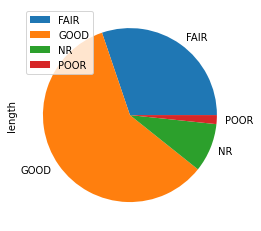

In [39]:
#Visualize overall conditions of the roads using piechart
rating[['rating_word','length']].groupby(by=['rating_word']).sum().plot.pie(y='length')

And let's use the true power of geopandas - visualize the streetmap.

<AxesSubplot:>

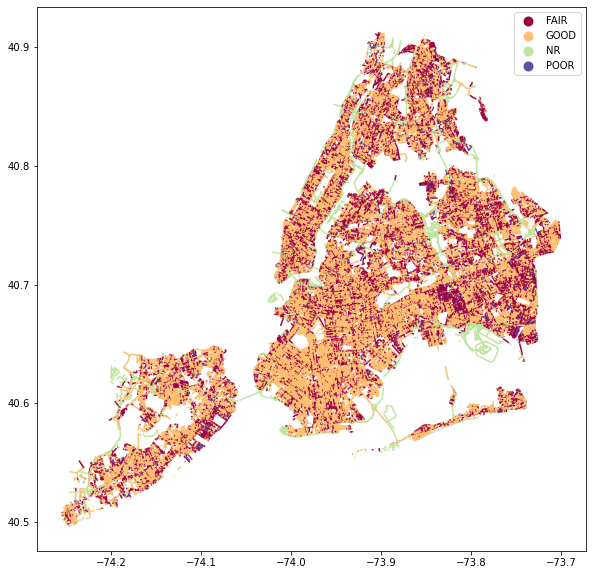

In [40]:
rating.plot(column='rating_word',cmap='Spectral',figsize=(10,10),legend=True)

### Task 3.
Visualize only the poorly maintained roads so we can zoom into those that need particular attention.

<AxesSubplot:>

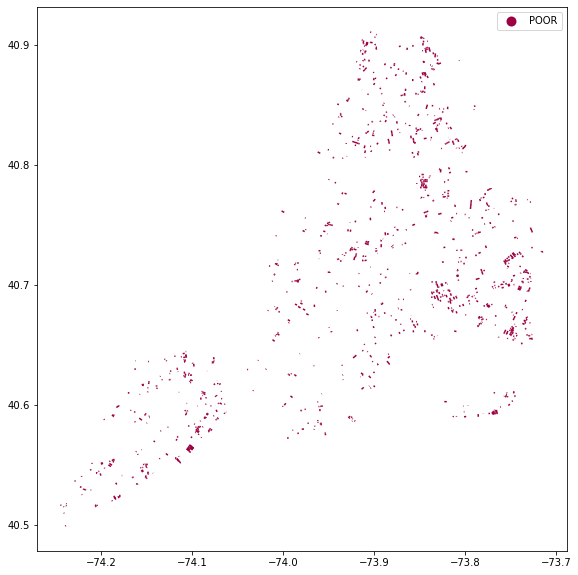

In [41]:
rating[rating.rating_word == 'POOR'].plot(column='rating_word',cmap='Spectral',figsize=(10,10),legend=True)

### Task 4. COVID-19 Data by ZIP Code

This dataset includes confirmed case rates, case counts, death rates, death counts, and the percent of people tested with a positive result since March. Follwing download links refer to the dataset uploaded on Sep 1st. Dataset is provided by NYC health, please check https://www1.nyc.gov/site/doh/covid/covid-19-data.page for more information and other COVID19 related datasets.

Task aggregate by borough and calculate: 
    
* Total cases   
* Positive case percentage among all the tests administered 
* Positive case percentage among the borough population 
    
Visualize all as barplots. Notice that both quantities b) and c) matter as otherwise the percentage of people tested positive might depend on the testing availability and practice which are not necessary consistent among boroughs.

In [42]:
url = 'https://raw.githubusercontent.com/nychealth/coronavirus-data/7953c97d1e58bbed9934ea04affb12ca74d9c0fb/data-by-modzcta.csv'
df = pd.read_csv(url)
df.head()

,MODIFIED_ZCTA,NEIGHBORHOOD_NAME,BOROUGH_GROUP,COVID_CASE_COUNT,COVID_CASE_RATE,POP_DENOMINATOR,COVID_DEATH_COUNT,COVID_DEATH_RATE,PERCENT_POSITIVE,TOTAL_COVID_TESTS
0,10001,Chelsea/NoMad/West Chelsea,Manhattan,441,1871.58,23563.03,26,110.34,6.50,6786
1,10002,Chinatown/Lower East Side,Manhattan,1335,1739.29,76755.41,161,209.76,7.66,17439
2,10003,East Village/Gramercy/Greenwich Village,Manhattan,543,1009.26,53801.62,35,65.05,3.53,15381
3,10004,Financial District,Manhattan,40,1095.71,3650.61,1,27.39,4.84,827
4,10005,Financial District,Manhattan,96,1143.39,8396.11,2,23.82,4.53,2117


<AxesSubplot:xlabel='BOROUGH_GROUP'>

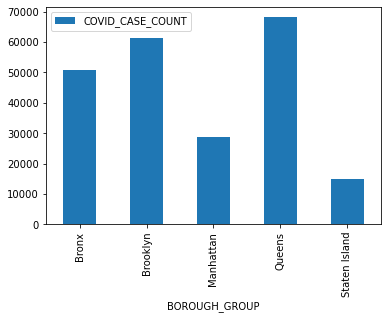

In [43]:
df[['BOROUGH_GROUP','COVID_CASE_COUNT']].groupby(by=['BOROUGH_GROUP']).sum().plot.bar()

<AxesSubplot:xlabel='BOROUGH_GROUP'>

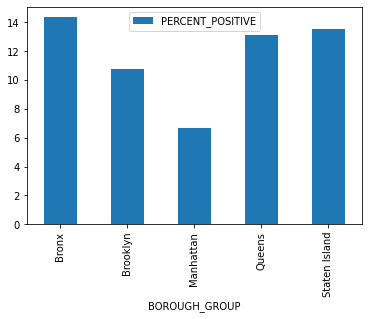

In [44]:
dfBoro = df.groupby(['BOROUGH_GROUP']).sum()
dfBoro['PERCENT_POSITIVE'] = 100 * dfBoro['COVID_CASE_COUNT'] / dfBoro['TOTAL_COVID_TESTS']
dfBoro[['PERCENT_POSITIVE']].plot.bar()

<AxesSubplot:>

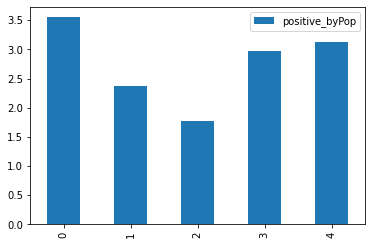

In [45]:
dfPop = df.groupby(by='BOROUGH_GROUP', as_index=False).sum()
dfPop['positive_byPop'] = dfPop['COVID_CASE_COUNT']/dfPop['POP_DENOMINATOR']*100
dfPop[['positive_byPop']].plot.bar()